In [1]:
from matplotlib import cm

from cmaqpy.runcmaq import CMAQModel
from cmaqpy import plots
from cmaqpy import utils
import monetio as mio

/home/jas983/anaconda3/envs/oshwind/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:50: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


Please install s3fs if retrieving from the Amazon S3 Servers.  Otherwise continue with local data
Please install h5netcdf to open files from the Amazon S3 servers.


In [2]:
# Specify the start/end times
start_datetime = 'August 06, 2016'  # first day that you want run
end_datetime = 'August 14, 2016'  # last day you want run
# Define the coordinate name (must match that in GRIDDESC)
coord_name = 'LAM_40N97W'
# Create a CMAQModel objects
base_sim_12 = CMAQModel(start_datetime, end_datetime, '2016Base_12OTC2', coord_name, '12OTC2', setup_yaml='dirpaths_2016Base_12OTC2.yml')
ren_sim_12 = CMAQModel(start_datetime, end_datetime, '2016_12OTC2', coord_name, '12OTC2', setup_yaml='dirpaths_2016_12OTC2.yml')
base_sim_4 = CMAQModel(start_datetime, end_datetime, '2016Base_4OTC2', coord_name, '4OTC2', setup_yaml='dirpaths_2016Base_4OTC2.yml')
ren_sim_4 = CMAQModel(start_datetime, end_datetime, '2016_4OTC2', coord_name, '4OTC2', setup_yaml='dirpaths_2016_4OTC2.yml')

In [3]:
%%capture
# Use monit IO to read in the ACONC data
conc_base_12 = f'{base_sim_12.POST}/COMBINE_ACONC_{base_sim_12.cctm_runid}_201608.nc'
conc_ren_12 = f'{ren_sim_12.POST}/COMBINE_ACONC_{ren_sim_12.cctm_runid}_201608.nc'
c_base_12 = mio.cmaq.open_dataset(fname=conc_base_12)
c_ren_12 = mio.cmaq.open_dataset(fname=conc_ren_12)

conc_base_4 = f'{base_sim_4.POST}/COMBINE_ACONC_{base_sim_4.cctm_runid}_201608.nc'
conc_ren_4 = f'{ren_sim_4.POST}/COMBINE_ACONC_{ren_sim_4.cctm_runid}_201608.nc'
c_base_4 = mio.cmaq.open_dataset(fname=conc_base_4)
c_ren_4 = mio.cmaq.open_dataset(fname=conc_ren_4)

In [4]:
# Convert all to Eastern Time
c_base_12 = utils.convert_tz_xr(c_base_12)
c_ren_12 = utils.convert_tz_xr(c_ren_12)

c_base_4 = utils.convert_tz_xr(c_base_4)
c_ren_4 = utils.convert_tz_xr(c_ren_4)

In [5]:
# Get map projections and boundaries
ccrs_12 = plots.get_proj(c_ren_12)
proj_bounds_12 = plots.get_domain_boundary(c_ren_12, ccrs_12)
ccrs_4 = plots.get_proj(c_ren_4)
proj_bounds_4 = plots.get_domain_boundary(c_ren_4, ccrs_4)

In [6]:
# Get the plot variables
pm25_mean_12 = c_ren_12.PM25_TOT.mean(dim='time').squeeze()
pm25_mean_diff_12 = (c_ren_12.PM25_TOT - c_base_12.PM25_TOT).mean(dim='time').squeeze()
pm25_mean_4 = c_ren_4.PM25_TOT.mean(dim='time').squeeze()
pm25_mean_diff_4 = (c_ren_4.PM25_TOT - c_base_4.PM25_TOT).mean(dim='time').squeeze()

o3_mean_12 = c_ren_12.O3.mean(dim='time').squeeze()
o3_mean_diff_12 = (c_ren_12.O3 - c_base_12.O3).mean(dim='time').squeeze()
o3_mean_4 = c_ren_4.O3.mean(dim='time').squeeze()
o3_mean_diff_4 = (c_ren_4.O3 - c_base_4.O3).mean(dim='time').squeeze()

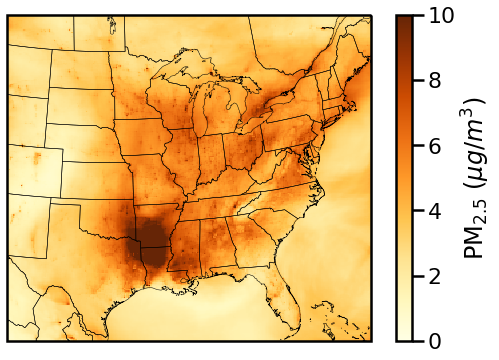

In [26]:
# Plot PM2.5 for the 12km domain
plots.conc_map(pm25_mean_12, cmap=cm.get_cmap('YlOrBr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_12, proj_bounds=proj_bounds_12, 
    vmin=0, vmax=10, cbar_args={"cbar_ticks": [0, 2, 4, 6, 8, 10], "cbar_label": 'PM$_{2.5}$ ($\mu g/m^{3}$)'}, 
    savefig=True, figpath='../cmaqpy/data/plots/pm25_12km.png')


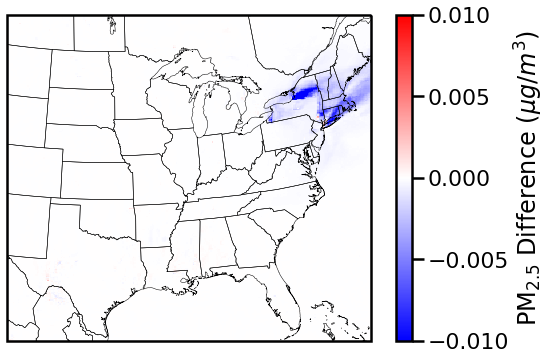

In [27]:
# Plot PM2.5 Difference for the 12km domain
plots.conc_map(pm25_mean_diff_12, cmap=cm.get_cmap('bwr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_12, proj_bounds=proj_bounds_12, 
    vmin=-0.01, vmax=0.01, cbar_args={"cbar_ticks": [-0.01, -0.005, 0, 0.005, 0.01], "cbar_label": 'PM$_{2.5}$ Difference ($\mu g/m^{3}$)'}, savefig=True, figpath='../cmaqpy/data/plots/pm25_diff_12km.png')

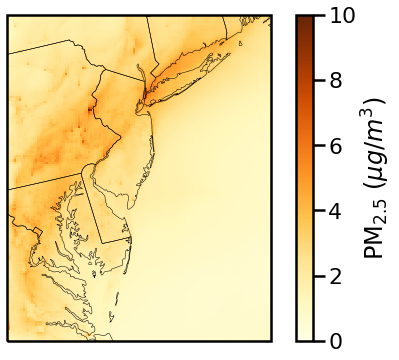

In [28]:
# Plot PM2.5 for the 4km domain
plots.conc_map(pm25_mean_4, cmap=cm.get_cmap('YlOrBr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_4, proj_bounds=proj_bounds_4, 
    vmin=0, vmax=10, cbar_args={"cbar_ticks": [0, 2, 4, 6, 8, 10], "cbar_label": 'PM$_{2.5}$ ($\mu g/m^{3}$)'}, 
    savefig=True, figpath='../cmaqpy/data/plots/pm25_4km.png')

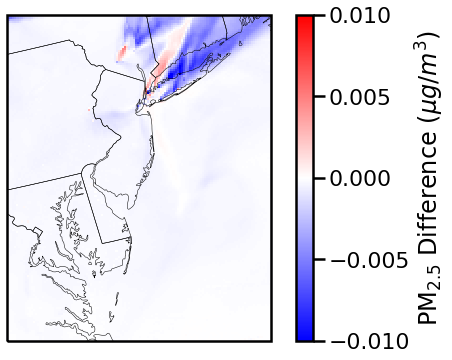

In [29]:
# Plot PM2.5 Difference for the 12km domain
plots.conc_map(pm25_mean_diff_4, cmap=cm.get_cmap('bwr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_4, proj_bounds=proj_bounds_4, 
    vmin=-0.01, vmax=0.01, cbar_args={"cbar_ticks": [-0.01, -0.005, 0, 0.005, 0.01], "cbar_label": 'PM$_{2.5}$ Difference ($\mu g/m^{3}$)'}, savefig=True, figpath='../cmaqpy/data/plots/pm25_diff_4km.png')

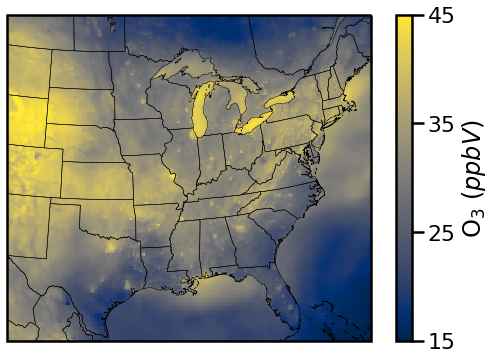

In [30]:
# Plot O3 for the 12km domain
plots.conc_map(o3_mean_12, cmap=cm.get_cmap('cividis'), figsize=(9,6), ax=None, cartopy_crs=ccrs_12, proj_bounds=proj_bounds_12, 
    vmin=15, vmax=45, cbar_args={"cbar_ticks": [15, 25, 35, 45], "cbar_label": 'O$_{3}$ ($ppbV$)'}, 
    savefig=True, figpath='../cmaqpy/data/plots/o3_12km.png')

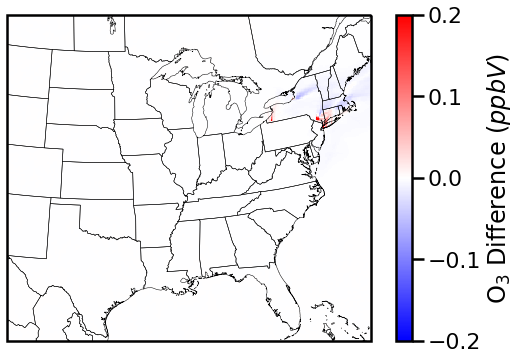

In [31]:
# Plot O3 diff for the 12km domain
plots.conc_map(o3_mean_diff_12, cmap=cm.get_cmap('bwr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_12, proj_bounds=proj_bounds_12, 
    vmin=-0.2, vmax=0.2, cbar_args={"cbar_ticks": [-0.2, -0.1, 0, 0.1, 0.2], "cbar_label": 'O$_{3}$ Difference ($ppbV$)'}, 
    savefig=True, figpath='../cmaqpy/data/plots/o3_diff_12km.png')

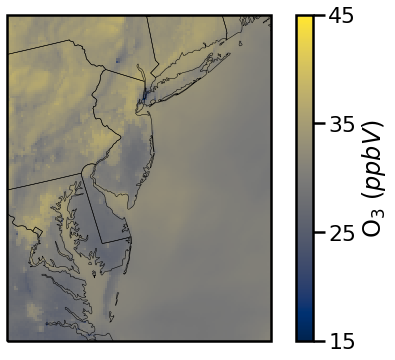

In [32]:
# Plot O3 for the 12km domain
plots.conc_map(o3_mean_4, cmap=cm.get_cmap('cividis'), figsize=(9,6), ax=None, cartopy_crs=ccrs_4, proj_bounds=proj_bounds_4, 
    vmin=15, vmax=45, cbar_args={"cbar_ticks": [15, 25, 35, 45], "cbar_label": 'O$_{3}$ ($ppbV$)'}, 
    savefig=True, figpath='../cmaqpy/data/plots/o3_4km.png')

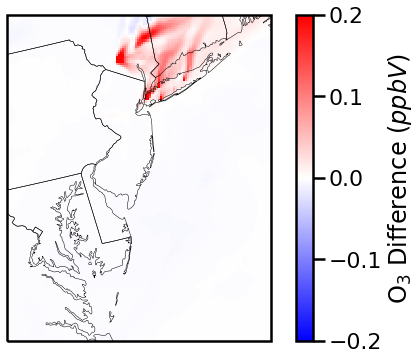

In [33]:
# Plot O3 diff for the 4km domain
plots.conc_map(o3_mean_diff_4, cmap=cm.get_cmap('bwr'), figsize=(9,6), ax=None, cartopy_crs=ccrs_4, proj_bounds=proj_bounds_4, 
    vmin=-0.2, vmax=0.2, cbar_args={"cbar_ticks": [-0.2, -0.1, 0, 0.1, 0.2], "cbar_label": 'O$_{3}$ Difference ($ppbV$)'}, 
    savefig=True, figpath='../cmaqpy/data/plots/o3_diff_4km.png')